In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)
import warnings
warnings.filterwarnings('ignore')
import sys
import rdkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import collections
import keras_hub as keras_nlp
import keras
import re
import wget

In [ ]:
!pwd

In [ ]:
!ls {DATA_PATH}

In [ ]:
ROOT_DIR = '/data/user/home/mhossai5/DPP-New2025/'
DATA_PATH = ROOT_DIR+'data'
OUTPUT_PATH = ROOT_DIR+'weights'

In [11]:
df = pd.read_parquet(os.path.join(DATA_PATH,'dpp4-26-03-25-feat.parquet'))
df

,id,smiles,standard_value,standard_type,standard_units,target_organism,target_pref_name,pIC50,source,label,...,ECFP_512,Llama3-2_Embedding,ChemBERT2_Embedding,MolWt,LogP,TPSA,HBD,HBA,RotatableBonds,Physiochemical
0,CHEMBL93558,N[C@@H](CC1CCCCC1)C(=O)N1CCCCC1,217000.00,IC50,nM,Homo sapiens,Dipeptidyl peptidase IV,3.663540,ChEMBL,inactive,...,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.49902532, 2.9190297, -0.23703773, -0.25883...","[-0.38957188, -0.6216704, 0.4703551, 0.1626513...",238.375,2.29660,46.33,1.0,2.0,3.0,"[238.37499999999994, 2.2966000000000006, 46.33..."
1,CHEMBL443622,C[C@H](N)C(=O)N1CCCC1,41000.00,IC50,nM,Homo sapiens,Dipeptidyl peptidase IV,4.387216,ChEMBL,inactive,...,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.9239326, 2.7885501, 0.38945127, 0.3505689,...","[-0.3062373, -0.24003226, 0.14207578, 0.525902...",142.202,-0.04400,46.33,1.0,2.0,1.0,"[142.20199999999997, -0.04400000000000004, 46...."
2,CHEMBL403882,O=C([C@@H]1CCCN1)N1CCCC1,15000.00,IC50,nM,Homo sapiens,Dipeptidyl peptidase IV,4.823909,ChEMBL,inactive,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.41079238, 2.760039, 0.025078857, -0.101544...","[-0.3257358, -0.012994111, 0.17750713, -0.0522...",168.240,0.36080,32.34,1.0,2.0,1.0,"[168.23999999999998, 0.3608, 32.34, 1.0, 2.0, ..."
3,CHEMBL328655,S=C(C1CCCN1)N1CCCC1,500000.00,IC50,nM,Homo sapiens,Dipeptidyl peptidase IV,3.301030,ChEMBL,inactive,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.13337657, 2.8452492, 0.630767, 0.08860778,...","[-0.0054997415, -0.37361592, 0.015422794, 0.30...",184.308,1.16160,15.27,1.0,2.0,1.0,"[184.30799999999996, 1.1616, 15.27, 1.0, 2.0, ..."
4,CHEMBL328795,NC(=O)CC(N)C(=O)N1CCCC1,188000.00,IC50,nM,Homo sapiens,Dipeptidyl peptidase IV,3.725842,ChEMBL,inactive,...,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.6948919, 2.6412396, 0.3524785, -0.21108356...","[-0.6008385, -0.16555355, 0.1292091, 0.9035775...",185.227,-1.18850,89.42,2.0,3.0,3.0,"[185.22699999999995, -1.1885000000000001, 89.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,6310,N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(C1)CC(C2)(C3)O,10.00,IC50,nM,Human,dipeptidyl peptidase 4,8.000000,GTP,active,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.034391124, 3.2505064, -0.06226227, -0.8268...","[-1.1099385, 0.32984978, 0.77433217, 0.4287404...",303.406,1.17428,76.36,2.0,4.0,3.0,"[303.40600000000006, 1.1742799999999993, 76.36..."
6559,6319,N#Cc1ccccc1Cn1c(cc(=O)n(c1=O)C)N1CCC[C@H](C1)N,3.40,IC50,nM,Human,dipeptidyl peptidase 4,8.468521,GTP,active,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.4544638, 3.4690077, 0.44993114, -0.4079677...","[-0.5232935, -0.16444466, 1.0117201, 0.1044423...",339.399,0.39448,97.05,1.0,7.0,3.0,"[339.39900000000017, 0.3944800000000007, 97.04..."
6560,9893,OB([C@@H]1CCCN1C(=O)CNC(=O)c1cccc2c1cccc2)O,20000.00,IC50,nM,Human,dipeptidyl peptidase 4,4.698970,GTP,inactive,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.9101596, 2.5416348, 0.19975038, -0.3455297...","[-0.7491181, 0.03879051, 1.5210431, 0.18013704...",326.161,0.57260,89.87,3.0,4.0,4.0,"[326.16100000000006, 0.5726000000000004, 89.87..."
6561,9906,O=C(N1CSCC1)[C@H]1NC[C@H](C1)N1CCN(CC1)c1cc(nn...,0.37,IC50,nM,Human,dipeptidyl peptidase 4,9.431798,GTP,active,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.29460245, 3.2372339, -0.071798466, -0.2784...","[-0.5887734, -0.385331, 1.0864619, -0.22392586...",426.590,1.56612,56.64,1.0,7.0,4.0,"[426.59000000000015, 1.5661199999999997, 56.64..."


In [12]:
max_len = 212

In [13]:
X = df[df['splits']=='train']['smiles'].tolist()
y = df[df['splits']=='train']['target']
X[:5]

['N[C@@H](CC1CCCCC1)C(=O)N1CCCCC1',
 'C[C@H](N)C(=O)N1CCCC1',
 'O=C([C@@H]1CCCN1)N1CCCC1',
 'S=C(C1CCCN1)N1CCCC1',
 'NC(=O)CC(N)C(=O)N1CCCC1']

In [14]:
y.value_counts()

target
0    2866
1    2384
Name: count, dtype: int64

In [42]:
X_test =df[df['splits']=='test']['smiles'].tolist()
y_test =df[df['splits']=='test']['target']

In [16]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.05, stratify = y,random_state = 42,shuffle = True)
print('Train size: ',len(X_train))
print('Validation size: ',len(X_valid))

Train size:  4987
Validation size:  263


In [18]:
def load_vocab(vocab_file = ROOT_DIR+'data/vocab.txt'):
    """Loads a vocabulary file into a dictionary."""
    if not os.path.exists(vocab_file):
        wget.download("https://github.com/deepchem/deepchem/raw/2.4.0/deepchem/feat/tests/data/vocab.txt" ,out = vocab_file)

    vocab = collections.OrderedDict()
    with open(vocab_file, "r", encoding="utf-8") as reader:
        tokens = reader.readlines()
    for index, token in enumerate(tokens):
        token = token.rstrip("\n")
        vocab[token] = index
    return vocab

vocab = load_vocab()
vocab_size = len(vocab)

In [19]:
import re

In [20]:
# In Molecule generation there is difference tokenization method
# ref: https://github.com/devalab/molgpt/blob/72ff33ae747c0a4908b822732019a66e965a595a/generate/dataset.py#L41
# ref: https://github.com/Fraunhofer-SCAI/llamol/blob/main/tokenizer.py
from datasets import load_dataset
SMI_REGEX_PATTERN = r"""(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\|\/|:|~|@|\?|>>?|\*|\$|\%[0-9]{2}|[0-9])"""
regex = re.compile(SMI_REGEX_PATTERN)
# ref: https://www.kaggle.com/code/hoyso48/2nd-place-solution-training?scriptVersionId=141882060&cellId=9
TABLE = tf.lookup.StaticHashTable(
    initializer=tf.lookup.KeyValueTensorInitializer(
        keys=tf.constant(list(vocab.keys()),tf.string),
        values=tf.constant(list(vocab.values()),tf.int32),
    ),
    default_value=tf.constant(-1),
    name="tokenize"
)
def encode_token(mol,target):
    def wrapper(smi):
        smi = smi.numpy().decode()
        return tf.constant(regex.findall(smi))
    
    mol = tf.py_function(wrapper,[mol],[tf.string])[0]
    
    mol = TABLE.lookup(mol)
    
    return tf.cast(mol,'int64'),target

def get_data(x,y, batch_size,pad_value = vocab['[PAD]'],shuffle=False):

    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.map(encode_token, tf.data.AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(shuffle)

    if batch_size:
        ds = ds.padded_batch(batch_size, padding_values=tf.cast(pad_value,'int64'), padded_shapes=([max_len],[]))

    ds = ds.prefetch(tf.data.AUTOTUNE)

    return ds

I0000 00:00:1743234179.615820   57867 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:81:00.0, compute capability: 8.0


In [21]:
batch_size =8
train_ds = get_data(X_train,y_train,batch_size=batch_size,shuffle=True)
valid_ds = get_data(X_valid,y_valid,batch_size=batch_size,)

In [22]:
for i in valid_ds:
    break

In [27]:
from tensorflow.keras import ops
from tensorflow.keras import layers

In [28]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [29]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

        
    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [30]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)
x = embedding_layer(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [31]:
model.compile(
#     optimizer = 'auto',
    optimizer = keras.optimizers.Adam(
        learning_rate=0.0001,
        ),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= [keras.metrics.SparseCategoricalAccuracy()],
)

In [32]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 212)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_and_position_embedding    │ (None, 212, 32)        │        25,696 │
│ (TokenAndPositionEmbedding)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 212, 32)        │        10,656 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 212, 32)        │        10,656 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ (None, 212, 32)        │        10,656 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,366 (227.99 KB)

 Trainable params: 58,366 (227.99 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
valid_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 212), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [34]:
model.fit(
    train_ds,
    epochs = 30, 
    validation_data = valid_ds,
         )

Epoch 1/30


I0000 00:00:1743234214.356748   58764 service.cc:148] XLA service 0x2aad080010f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743234214.356830   58764 service.cc:156]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
I0000 00:00:1743234215.201102   58764 cuda_dnn.cc:529] Loaded cuDNN version 90300


 38/624 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7499 - sparse_categorical_accuracy: 0.4872

I0000 00:00:1743234286.513943   58764 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


624/624 ━━━━━━━━━━━━━━━━━━━━ 145s 109ms/step - loss: 0.7107 - sparse_categorical_accuracy: 0.5190 - val_loss: 0.6576 - val_sparse_categorical_accuracy: 0.6654
Epoch 2/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6662 - sparse_categorical_accuracy: 0.6006 - val_loss: 0.6120 - val_sparse_categorical_accuracy: 0.6920
Epoch 3/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6219 - sparse_categorical_accuracy: 0.6627 - val_loss: 0.5459 - val_sparse_categorical_accuracy: 0.7148
Epoch 4/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5450 - sparse_categorical_accuracy: 0.7417 - val_loss: 0.5109 - val_sparse_categorical_accuracy: 0.7376
Epoch 5/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5141 - sparse_categorical_accuracy: 0.7599 - val_loss: 0.4969 - val_sparse_categorical_accuracy: 0.7567
Epoch 6/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4983 - sparse_categorical_accuracy: 0.7727 - val_loss: 0.4923 - val_sparse_categorical_accuracy: 0.7605
Epoch 7/30


In [36]:
model.save(os.path.join(OUTPUT_PATH,'trans-v1-dpp4.keras'))

In [37]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score, matthews_corrcoef

In [38]:
test_ds =get_data(X_test,y_test,batch_size= 8)

In [39]:
y_pred = model.predict(test_ds)

165/165 ━━━━━━━━━━━━━━━━━━━━ 23s 132ms/step


In [40]:
print("accuracy: ",accuracy_score(y_test,y_pred.argmax(-1)))
print("f1_score: ",f1_score(y_test,y_pred.argmax(-1)))      
print("roc_auc_score: ",roc_auc_score(y_test.values,tf.nn.sigmoid(y_pred)[:,1].numpy()))      
print("matthews_corrcoef: ",matthews_corrcoef(y_test,y_pred.argmax(-1)))

accuracy:  0.7821782178217822
f1_score:  0.7306967984934086
roc_auc_score:  0.8549383149401402
matthews_corrcoef:  0.5641877566675518


In [43]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    auc,
    ConfusionMatrixDisplay,
)

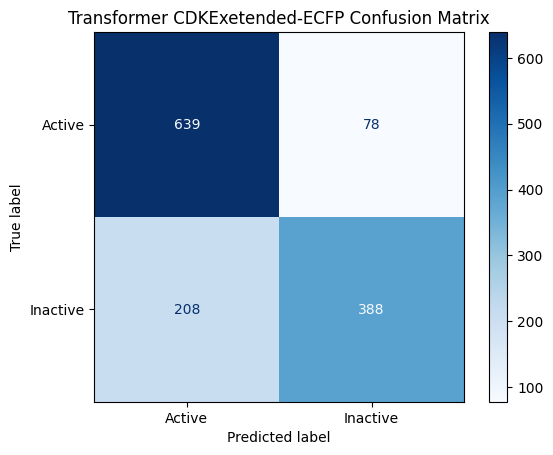

In [48]:
cm = confusion_matrix(y_test, y_pred.argmax(-1))

# 6. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['Active', 'Inactive'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Transformer CDKExetended-ECFP Confusion Matrix")
plt.show()

## Metrics results & Plot

In [47]:
hist = history.history

NameError: name 'history' is not defined

In [41]:
plt.title(f'{MODEL_NAME.upper()} CDKExetended-ECFP Training and Validation Accuracy')
plt.plot(hist['accuracy'],label= 'Training Accuracy')
plt.plot(hist['val_accuracy'],label= 'Valdidation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()
plt.title(f'{MODEL_NAME.upper()}  CDKExetended-ECFP Training and Validation Loss')
plt.plot(hist['loss'],label= 'Training Loss')
plt.plot(hist['val_loss'],label= 'Valdidation Loss')
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

NameError: name 'MODEL_NAME' is not defined